In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Takeoff Configuration

In [5]:
S_to_ft = 1900 * 3.28084
M_tow = 167539.99
CL_max_to = 2.362337237
sigma_to = 1/1

In [10]:
to_coeff = 37.5/(sigma_to * CL_max_to)

In [180]:
T_W_ratio = np.arange(start=0.0, stop=0.8, step=0.1)

In [181]:
W_S_CL_max_to = (S_to_ft/to_coeff) * T_W_ratio

In [182]:
W_S_CL_max_to

array([  0.        ,  39.2689492 ,  78.53789841, 117.80684761,
       157.07579681, 196.34474602, 235.61369522, 274.88264442])

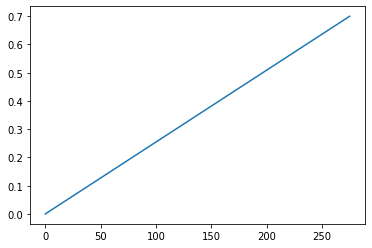

In [183]:
plt.plot(W_S_CL_max_to, T_W_ratio)

In [184]:
# Plot for various CLs
W_S_CL_12 = (S_to_ft/(37.5/(sigma_to * 1.2))) * T_W_ratio
W_S_CL_16 = (S_to_ft/(37.5/(sigma_to * 1.6))) * T_W_ratio
W_S_CL_18 = (S_to_ft/(37.5/(sigma_to * 1.8))) * T_W_ratio
W_S_CL_20 = (S_to_ft/(37.5/(sigma_to * 2.0))) * T_W_ratio
W_S_CL_24 = (S_to_ft/(37.5/(sigma_to * 2.4))) * T_W_ratio

In [185]:
W_S_CL_24

array([  0.       ,  39.8950144,  79.7900288, 119.6850432, 159.5800576,
       199.475072 , 239.3700864, 279.2651008])

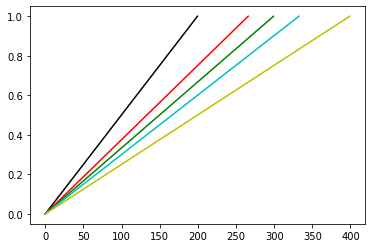

In [23]:
plt.plot(W_S_CL_12, T_W_ratio, 'k',
     W_S_CL_16, T_W_ratio, 'r',
     W_S_CL_18, T_W_ratio, 'g',
     W_S_CL_20, T_W_ratio, 'c',
     W_S_CL_24, T_W_ratio, 'y'
)
# ax.legend('Wing Loading Cl = 1.2', 'Wing Loading Cl = 1.6', 'Wing Loading Cl = 1.8', 'Wing Loading Cl = 2.0', 'Wing Loading Cl = 2.4')

## Landing Configuration

In [209]:
S_l_ft = 1500 * 3.28084
M_lw = 130298.04
sigma_l = 1
rho = 0.002376892
CL_max_l = 2.961026884

In [29]:
V_A = (S_l_ft/0.3) ** 0.5

In [31]:
V_sl = V_A / 1.3

In [215]:
V_sl_fts = V_sl * 1.68781

In [216]:
W_S_l = (V_sl_fts ** 2) * (rho * sigma_l * CL_max_l) / 2

In [217]:
W_S_l

34.15782071463021

In [220]:
W_S_l_CL_12 = (V_sl_fts ** 2) * (rho * sigma_l * 1.2) / 2 * (M_tow/M_lw)
W_S_l_CL_16 = (V_sl_fts ** 2) * (rho * sigma_l * 1.6) / 2 * (M_tow/M_lw)
W_S_l_CL_18 = (V_sl_fts ** 2) * (rho * sigma_l * 1.8) / 2 * (M_tow/M_lw)
W_S_l_CL_20 = (V_sl_fts ** 2) * (rho * sigma_l * 2.0) / 2 * (M_tow/M_lw)
W_S_l_CL_24 = (V_sl_fts ** 2) * (rho * sigma_l * 2.4) / 2 * (M_tow/M_lw)

In [223]:
W_S_l_CL_24

101.41139563293389

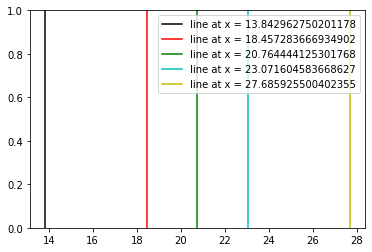

In [36]:
# x coordinates for the lines
xcoords = [W_S_l_CL_12, W_S_l_CL_16, W_S_l_CL_18, W_S_l_CL_20, W_S_l_CL_24]
# colors for the lines
colors = ['k','r','g', 'c', 'y']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c)

plt.legend()
plt.show()

In [38]:
# Wing Loading Takeoff Condition
W_S_to = W_S_l * (M_tow/M_lw)

In [39]:
W_S_to

43.920852078442145

In [40]:
M_lw / M_tow

0.7777130701750669

In [122]:
M_tow / M_lw

1.285821260243055

## Takeoff-Climb Gradient Requirements

In [225]:
CD_0 = 0.01914
AR = 9
e = 0.782262443
K = 0.045212148
# CL_max = 3.605769579 # Seems little too much
# CL_max = 2.961026884
CL_max = 2.4

### First Segment

In [226]:
CGR_1 = 0
CD_0_1 = CD_0 + 0.015 + (((0.03 * 1.2) - 0.004) / (AR ** 0.33))
# CD_0_1 = CD_0 + 0.015
e_1 = e - 0.05
k_1 = 1 / (math.pi * e_1 * AR)
CL_1 = CL_max / (1.04 ** 2)

In [227]:
print(CD_0_5, e_5)

0.12131109009780708 0.682262443


In [228]:
CD_1 = CD_0_1 + (k_1 * (CL_1 ** 2))

In [229]:
CD_1

0.2874470120455465

In [230]:
L_D_1 = (CL_1 / CD_1)
L_D_1

7.719457215617217

In [231]:
T_W_1 = 2 * (CGR_1 + (1 / L_D_1))
T_W_1

0.2590855735237193

### Second Segment

In [237]:
CGR_2 = 0.024
CD_0_2 = CD_0 + (((0.03 * 1.2) - 0.004) / (AR ** 0.33))
e_2 = e - 0.05
k_2 = 1 / (math.pi * e_2 * AR)
CL_2 = CL_max / (1.13 ** 2)

In [238]:
CD_2 = CD_0_2 + (k_2 * (CL_2 ** 2))
CD_2

0.20526479466311376

In [239]:
L_D_2 = (CL_2 / CD_2)
L_D_2

9.156718974541558

In [240]:
T_W_2 = 2 * (CGR_2 + (1 / L_D_2))
T_W_2

0.26641884692110823

### Final Segment

In [241]:
CGR_3 = 0.012
CD_0_3 = CD_0
e_3 = e
k_3 = 1 / (math.pi * e_3 * AR)
CL_3 = CL_max / (1.18 ** 2)

In [242]:
CD_3 = CD_0_3 + (k_3 * (CL_3 ** 2))
CD_3

0.15346275542910995

In [243]:
L_D_3 = (CL_3 / CD_3)
L_D_3

11.231667427110445

In [244]:
T_W_3 = 2 * (CGR_3 + (1 / L_D_3))
T_W_3

0.2020679505495772

### Landing AEO

In [245]:
CGR_4 = 0.032
CD_0_4 = CD_0 + 0.015 + ((0.15 * 1.2) / (AR ** 0.33))
e_4 = e - 0.1
k_4 = 1 / (math.pi * e_4 * AR)
CL_4 = CL_max / (1.13 ** 2)

In [246]:
CD_4 = CD_0_4 + (k_4 * (CL_4 ** 2))
CD_4

0.30444335320156146

In [247]:
L_D_4 = (CL_4 / CD_4)
L_D_4

6.173733209582421

In [248]:
T_W_4 = (CGR_4 + (1 / L_D_4))
T_W_4

0.1939765490429474

### Landing OEI

In [249]:
CGR_5 = 0.021
CD_0_5 = CD_0 + 0.015 + ((0.15 * 1.2) / (AR ** 0.33))
e_5 = e - 0.1
k_5 = 1 / (math.pi * e_5 * AR)
CL_5 = CL_max / (1.13 ** 2)

In [250]:
CD_5 = CD_0_5 + (k_5 * (CL_5 ** 2))
CD_5

0.30444335320156146

In [251]:
L_D_5 = (CL_5 / CD_5)
L_D_5

6.173733209582421

In [252]:
T_W_5 = 2 * (CGR_5 + (1 / L_D_5))
T_W_5

0.36595309808589477

## Rate of Climb

In [402]:
R_C = 300
tau = 0.5648
M_cruisew = 162285.93
q = 172.8810082
W_S_cr = 79.53806266
S = 2040.355638 #WINGLD sheet
V_cr = 761.5776

In [403]:
M_cruisew / M_tow

0.9686399647033523

In [404]:
CL_RC = M_cruisew/(q * S)

In [405]:
CD_RC = CD_0 + K * (CL_RC ** 2)

In [406]:
CL_RC / CD_RC

16.024887025543972

In [407]:
T_W_h = (300/V_cr) + (CD_RC/CL_RC)
T_W_h

0.4563220849160873

In [408]:
T_W_cr = ((q * CD_0) / W_S_cr) + ((K / q) * W_S_cr)

In [409]:
R_C_coeff = T_W_cr * W_S_cr * (1 / tau)

In [410]:
W_S_rc = np.arange(start=15, stop=280, step=0.1)

In [411]:
T_W_rc = (R_C_coeff/W_S_rc) * (5/4)
T_W_rc

array([0.73232539, 0.72747556, 0.72268953, ..., 0.0392738 , 0.03925976,
       0.03924573])

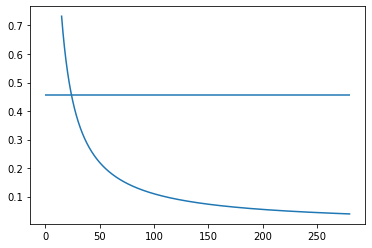

In [412]:
plt.plot(W_S_rc, T_W_rc)
plt.hlines(T_W_h, 0, 280)

# Combine for C-Diagram

## Cl = 2.4

Text(33, 0.6, 'Viable solution space')

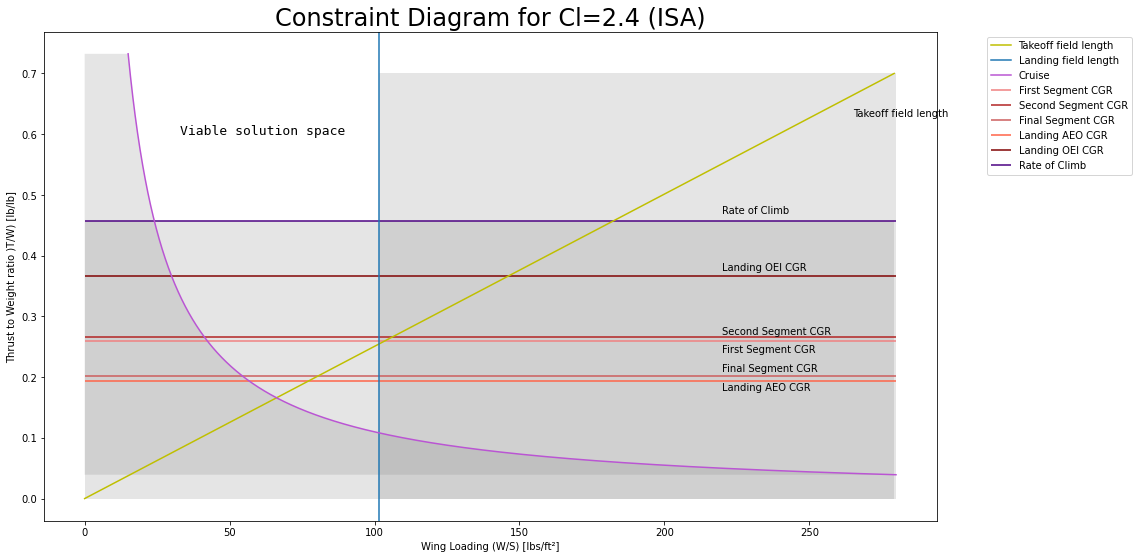

In [413]:
plt.figure(figsize=(16,9))

# Takeoff field length
plt.plot(W_S_CL_24, T_W_ratio, 'y', label='Takeoff field length')
plt.text(265, 0.63, "Takeoff field length", fontsize=10)
# plt.fill_betweenx(T_W_ratio, W_S_CL_24, fc='yellow', alpha=0.2)

# Landing field length
plt.axvline(W_S_l_CL_24, label='Landing field length')
# plt.fill_betweenx(T_W_ratio, W_S_l_CL_24, fc='aqua', alpha=0.2)

# Takeoff Climb Gradient
## First Segment
plt.hlines(T_W_1, 0, 280, colors='lightcoral', label='First Segment CGR')
plt.text(220, 0.24, "First Segment CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_1, 0.75, fc='lightcoral', alpha=0.2)
## Second Segment
plt.hlines(T_W_2, 0, 280, colors='firebrick', label='Second Segment CGR')
plt.text(220, 0.27, "Second Segment CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_2, 0.75, fc='firebrick', alpha=0.2)
## Final Segment
plt.hlines(T_W_3, 0, 280, colors='indianred', label='Final Segment CGR')
plt.text(220, 0.21, "Final Segment CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_3, 0.75, fc='indianred', alpha=0.2)
## Landing AEO
plt.hlines(T_W_4, 0, 280, colors='tomato', label='Landing AEO CGR')
plt.text(220, 0.178, "Landing AEO CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_4, 0.75, fc='tomato', alpha=0.2)
## Landing OEI
plt.hlines(T_W_5, 0, 280, colors='maroon', label='Landing OEI CGR')
plt.text(220, 0.375, "Landing OEI CGR", fontsize=10)
# plt.fill_between(W_S_CL_24, T_W_5, 0.75, fc='maroon', alpha=0.2)

# Rate of Climb
plt.hlines(T_W_h, 0, 280, colors='indigo', label = 'Rate of Climb')
plt.text(220, 0.47, "Rate of Climb", fontsize=10)
plt.plot(W_S_rc, T_W_rc, 'mediumorchid', label='Cruise')
# plt.fill_betweenx(T_W_rc, W_S_rc, 280, fc='darkorchid', alpha=0.2)

plt.fill_betweenx(T_W_ratio, W_S_l_CL_24, 280, fc='grey', alpha=0.2)
plt.fill_between(W_S_CL_24, 0, T_W_h, fc='grey', alpha=0.2)
# plt.axvspan(W_S_l_CL_24, 280, alpha=0.2, color='grey')
# plt.axvspan(0, W_S_l_CL_24, ymin=0, ymax=(T_W_h/0.73232539), alpha=0.2, color='grey')
plt.fill_betweenx(T_W_rc, W_S_rc, fc='grey', alpha=0.2)
plt.title("Constraint Diagram for Cl=2.4 (ISA)", fontsize=24)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Wing Loading (W/S) [lbs/ft²]")
plt.ylabel("Thrust to Weight ratio )T/W) [lb/lb]")
plt.text(33, 0.6, "Viable solution space", family="monospace", fontsize=13)